# **PyADS Tutorial** 😀
## This notebook aims to help you learn PyADS and how it help be helpful to you!~
## Prerequisites


*   Basic programming knowledge 📘
*   Good skills in copy and pasting 📗
*   Completing the Python for Noobs Guide would be nice, but not necessary 🐍

# **Let's get started!** 📕



---


# ⚡**Installation** ⚡
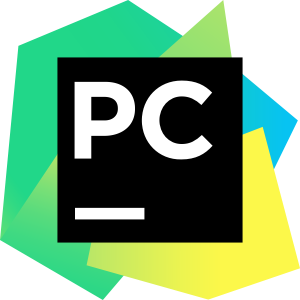
### Ensure you have some sort of Python IDE installed on your machine. I recommend PyCharm Community Edition. It's free and open-source and very user friendly. If it's youre first time install a Python IDE, ensure you select the "Add to PATH" checkbox. ✅
#### https://www.jetbrains.com/pycharm/download/#section=window
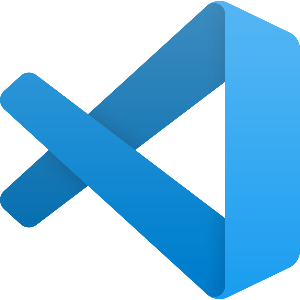
### Alternatively, you can use VS-Code. It's a more lightweight text editor but requires more configuration. It also allows you to run C#, C++ and Java code, and also allows you to code in ST if you install the extension pack. ⛪
#### https://code.visualstudio.com/Download


# 🐍**Getting Started with Python**🐍
## *Let's get down to business*
## Create a new Python Project in Pycharm using a Virtual Enviornment 🍀
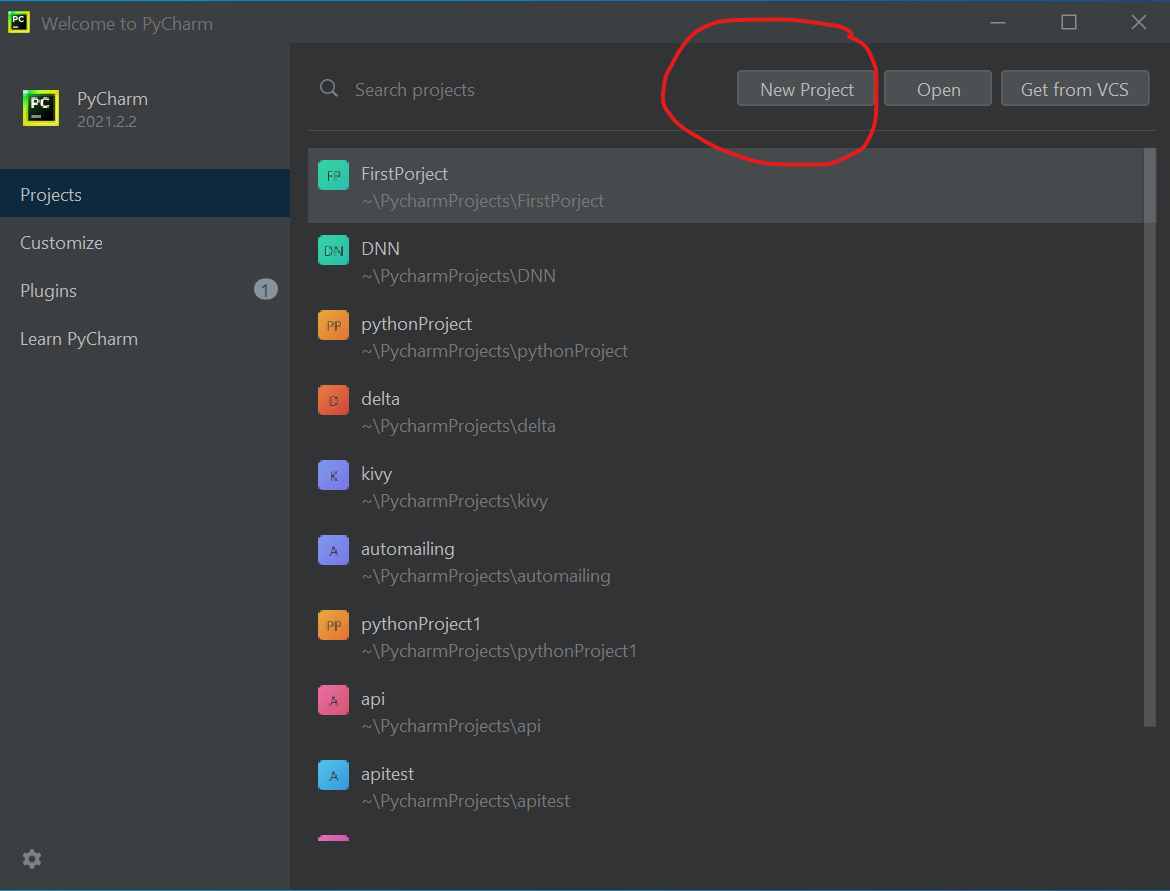
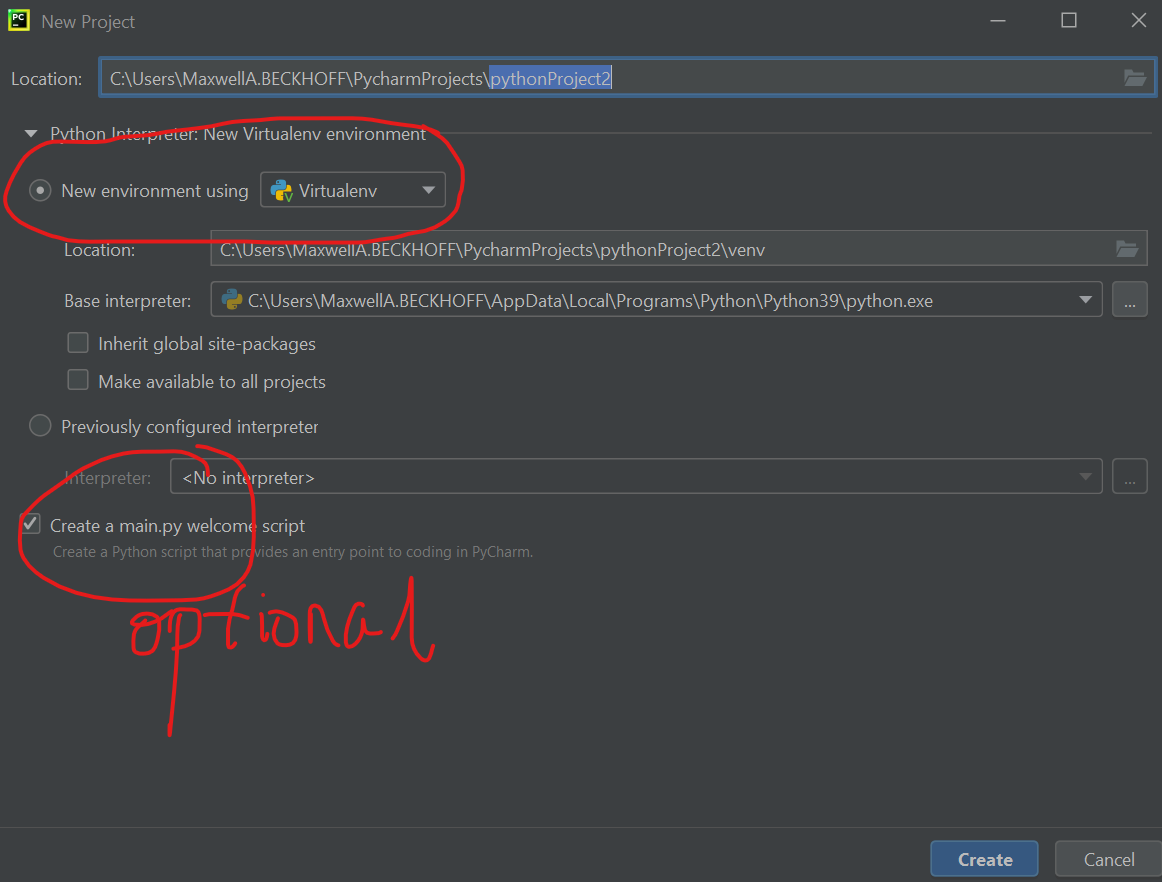

# **Congratulations! You've created your first Python Project** 👏👏👏
## Let's create a Python File 🐍
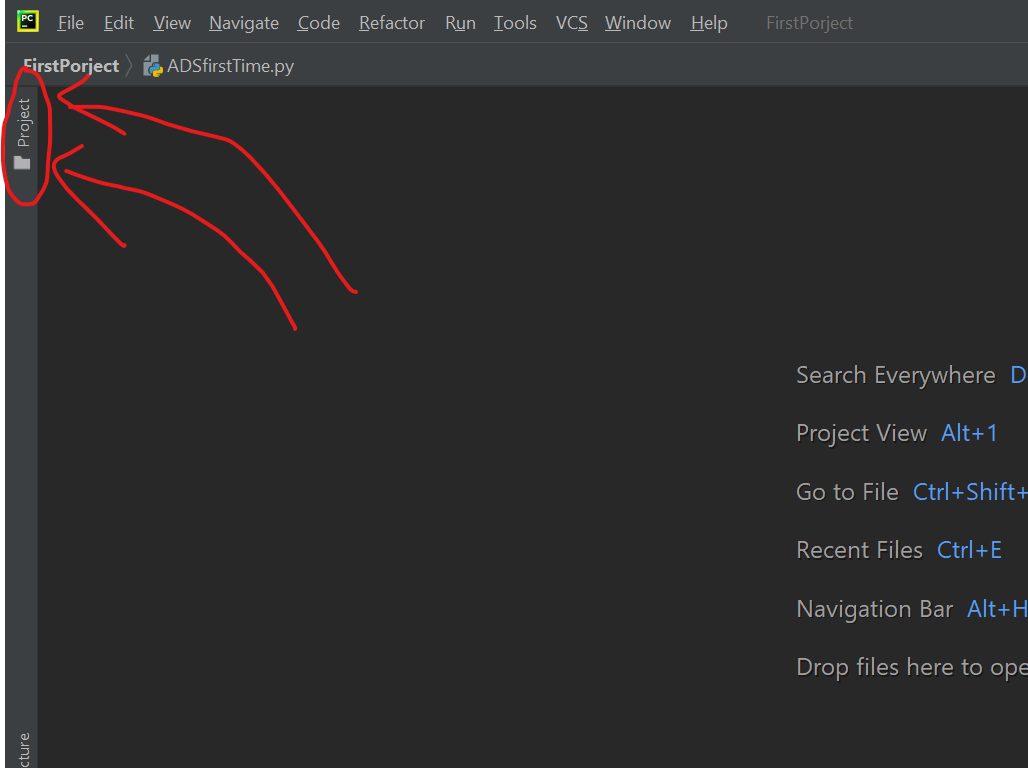
# Right click the folder path (AKA, your project name, NOT venv) and create a new Python File. For me I called it ADSfirstTime.py
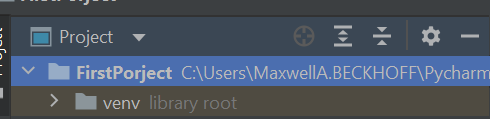
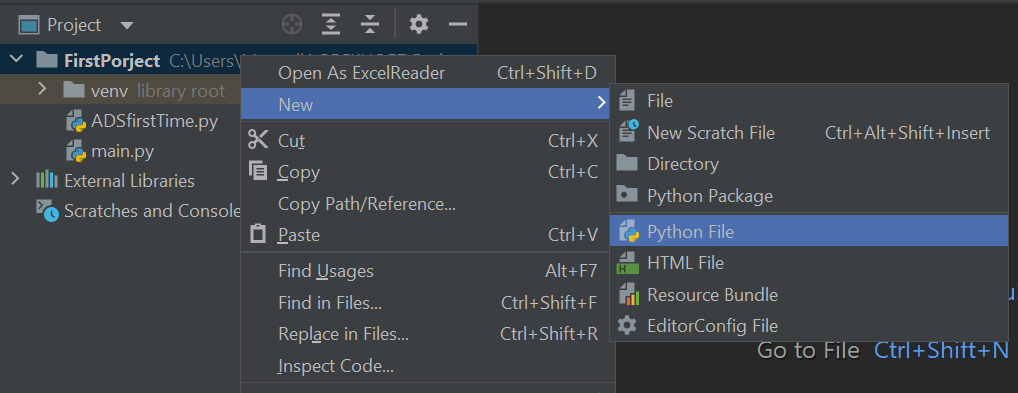

## Now, you should see a blank .py file appear!
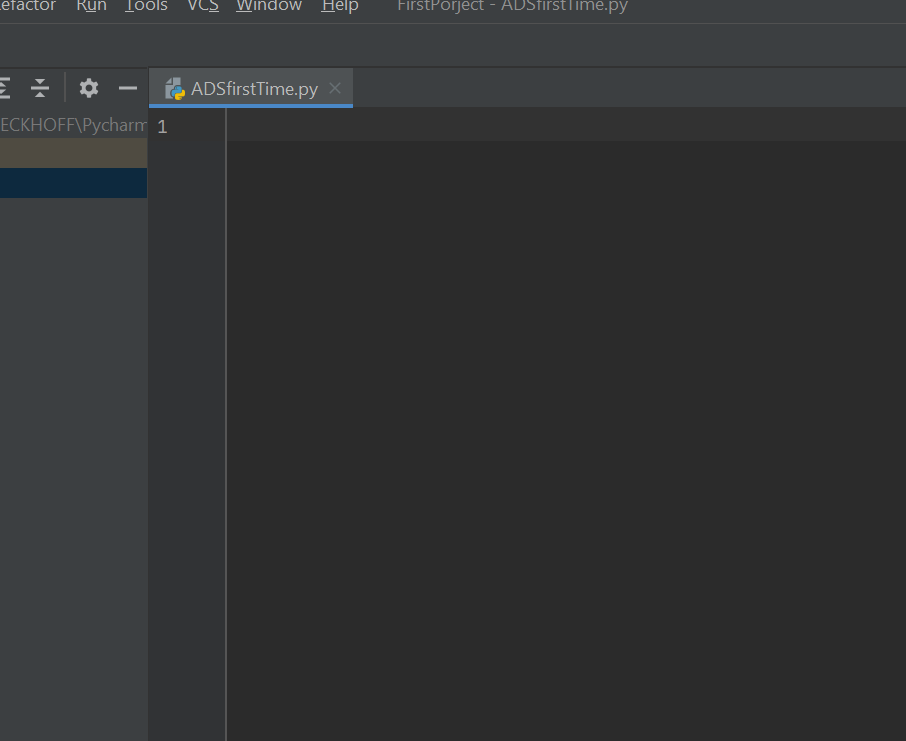

# 📦**Installing PyADS package**📦
# **Congratulations!** You're just ONE step away from writing some PyADS code. All we gotta do now is **INSTALL THE PYADS PACKAGE!**
## On the bottom of the screen, select on terminal
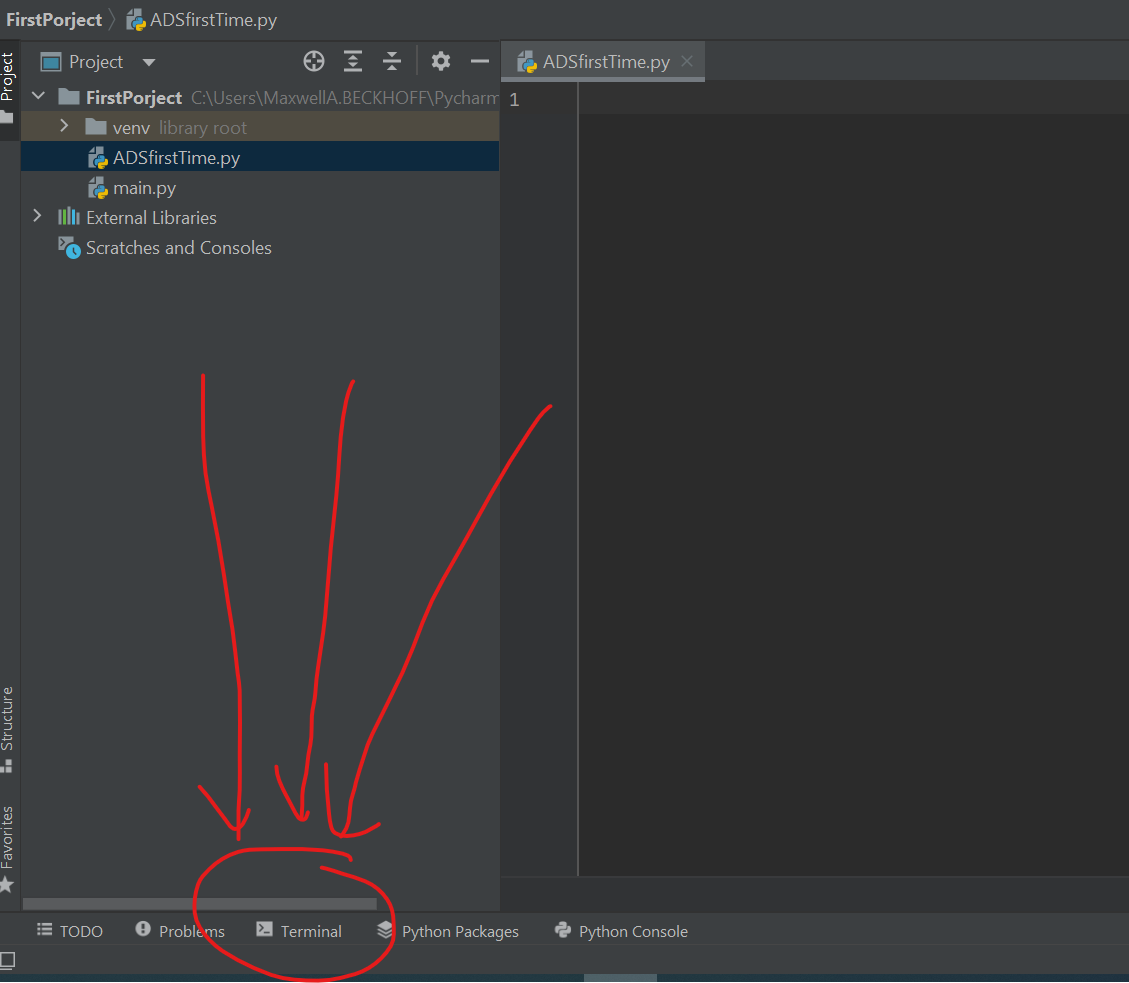
## Then, type in the following command:


```
pip install pyads
```
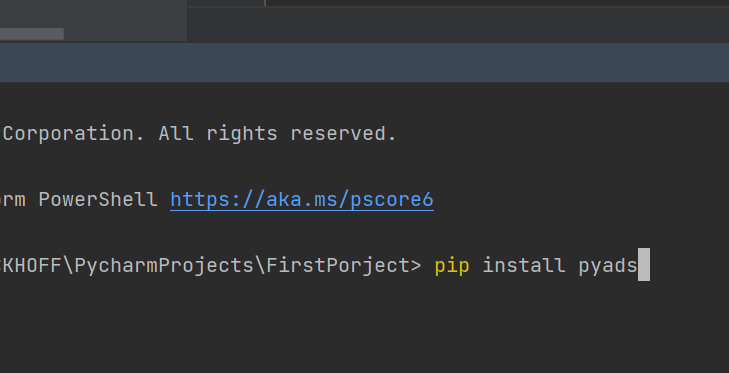
#Then, press **ENTER** and let it do its ✨magic✨
#For context, pip is a package manager that allows you to download open-source python packages from the internet. 🧑
# If an error pops up saying that pip is outdated, ignore it and continue 💅



---

# **Connecting to PLC**
# 🍳 Let's start cooking up some PyADS code! 🍳
## Firstly, we would need to reference the pyads package. So let's use an **import** statement! 🛬


```
import pyads
```
## Next, we would need to reference our PLC via it's AMSNETID. We can store it as a STRING 🧣


```
AMSNETID = "10.123.67.6.1.1"
```
## Following that, we have to instantiate our pyads connection and open the connection using the following lines of code. 📠


```
plc = pyads.Connection(AMSNETID, pyads.PORT_TC3PLC1)
plc.open()
print(f"Connected?: {plc.is_open}") #debugging statement, optional
print(f"Local Address? : {plc.get_local_address()}") #debugging statement, optional
```
## If you're lazy, like me, and just want the whole code, here it is!


```
import pyads

AMSNETID = "10.123.67.6.1.1"
plc = pyads.Connection(AMSNETID, pyads.PORT_TC3PLC1)
plc.open()
print(f"Connected?: {plc.is_open}")
print(f"Local Address? : {plc.get_local_address()}")
print(plc.read_state())
```

## If you're running this on localhost, make sure TWINCAT XAE is online and logged in! I assume this is self-explainatory.
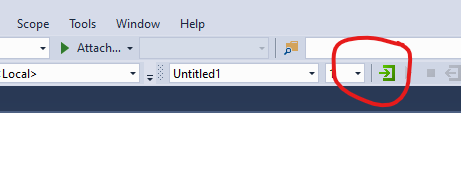
## If all goes well, you can run the script you've written so far.
## Right click on the tab you're on in Pycharm and click run!
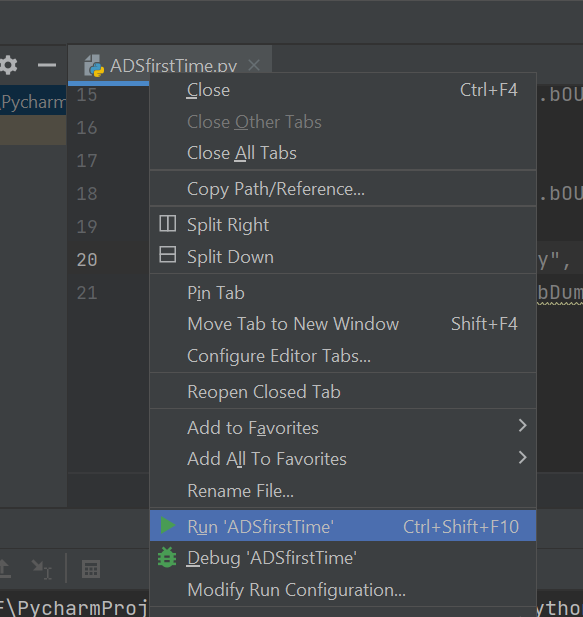

## If you've followed well in this tutorial, you should get the following output!
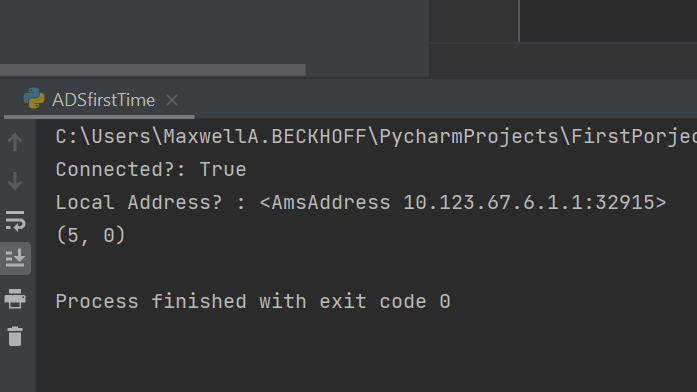
## If there are any problems, feel free to approach me! 😀


# **Reading and Writing Values**
## You've been writing python code for the past 15 minutes, you can pat yourself on the back! 👏
## Let's get into cooler things. Reading and writing values. 😎
## Let's create some variables in TwinCat to manipulate! ❗
# **In TwinCat, create a new GVL**
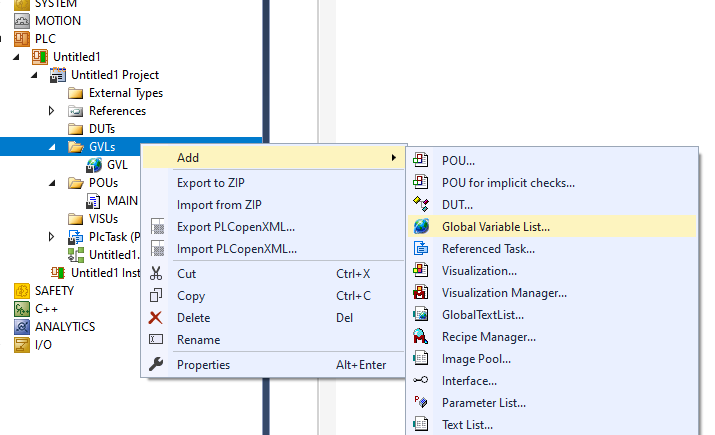

#Let's create some variables! ♟
```
{attribute 'qualified_only'}
VAR_GLOBAL
	bOut1: BOOL;
	bOut2: BOOL;
END_VAR
```
#**Under the MAIN POU,**
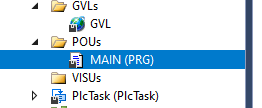

# In the initialization menu:
```
PROGRAM MAIN
VAR
	out1: BOOL;
	out2: BOOL;
	bDummy : BOOL;
	
END_VAR
```
# In the main program:
```
out1 := GVL.bOut1;
out2 := GVL.bOut2;
```
#This is how it should look like as of now!
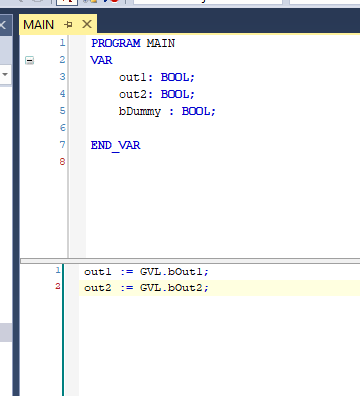

# Rebuild the solution, activate config and log in with online changes (I assume this is self-explainatory)





---


# **Reading GVL from PyADS**


### Here's the basic syntax of reading values though PyADS 💥
```
var = plc.read_by_name("NAMEOFVARIABLE")
```



### Insert the following lines of code in your python script in addition to your previously written script. 📓


```
bOut1 = plc.read_by_name("GVL.bOut1")
print(f"bOut1 State {bOut1}")
plc.close()
```
### Here's the whole program so far! 🤓


```
import pyads

AMSNETID = "10.123.67.6.1.1"
plc = pyads.Connection(AMSNETID, pyads.PORT_TC3PLC1)
plc.open()
print(f"Connected?: {plc.is_open}")
print(f"Local Address? : {plc.get_local_address()}")
print(plc.read_state())

bOut1 = plc.read_by_name("GVL.bOut1")
print(f"bOut1 State {bOut1}")

plc.close()
```
# Run the script and watch the ✨ magic ✨ happen~
####*Cross refer your GVL value and your python-read value. Are they the same?* 🤔
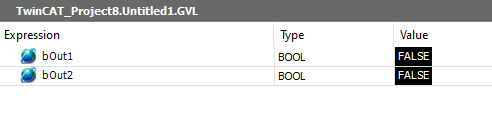
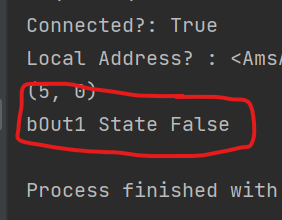
# If they are, congratulations! You've read your first value in the PLC through PyADS. You've made it this far! Now all thats left is to write values into the PLC!


# **Writing GVL from PyADS**
### The basic syntax to write values into the PLC is as follows: 💥


```
plc.write_by_name("VARIABLENAME", REPLACEMENTVALUE)
```
# Note: They have to be of the same data type!!! 🎓

#Insert the following lines of code into your project

```
plc.write_by_name("GVL.bOut1", True) #overrride values

bOut1 = plc.read_by_name("GVL.bOUt1") #reads to confirm 
print(f"Final State {bOut1}")
```
#This is how your code should look like so far. (From the top till now)


```
import pyads

AMSNETID = "10.123.67.6.1.1"
plc = pyads.Connection(AMSNETID, pyads.PORT_TC3PLC1)
plc.open()
print(f"Connected?: {plc.is_open}")
print(f"Local Address? : {plc.get_local_address()}")
print(plc.read_state())

bOut1 = plc.read_by_name("GVL.bOut1")
print(f"bOut1 State {bOut1}")


plc.write_by_name("GVL.bOut1", True)

bOut1 = plc.read_by_name("GVL.bOUt1")
print(f"Final State {bOut1}")

plc.close()
```

#Run the code to watch some more ✨magic✨!
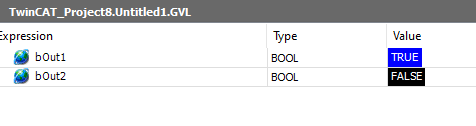
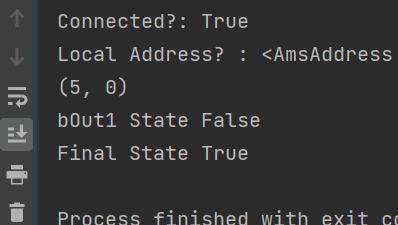

#**Common mistake-** closing the plc connection before the end of the script. Did you commit the same mistake?




# **Final Chapter: Reading and writing into local variables**
### Reading and writing into variables can be done in the same way we write into GVLs. We just need to reference the POU or PRG we want to change. 🤫
### In the main program, make 2 new variables: ⏰


```
iNumber: INT;
sWord: STRING;
```
### If you're an avid user of Ctrl-C Ctrl-V, here's the entire initialisation script so far: 🤓


```
PROGRAM MAIN
VAR

out1: BOOL;
out2: BOOL;
bDummy : BOOL;
iNumber: INT;
sWord: STRING;
	
END_VAR

```
### **Notice how we have 5 local variables now, but 2 are linked to GVLs**
### In order to test our program, we can do the following


*   Read the state of the variable BEFORE writing 👓
*   Write a value into the variable ✏
*   Conform the state of the variable by Reading AGAIN! 👓

### That's gonna take a huge amount of copy and pasting, so let's write a function to do it for us! 🤓


```
def readAndWrite(plcInput, variable, state):
    print(f"For variable {variable}:")
    print("before writing: ",plcInput.read_by_name(variable))
    plcInput.write_by_name(variable, state)
    print("after writing: ",plcInput.read_by_name(variable), '\n')
```
# We'll be using this function repeatedly in the following code sample.
# Copy and paste this completed code sample! 👍

```
import pyads

AMSNETID = "10.123.67.6.1.1" #change to what you need
plc = pyads.Connection(AMSNETID, pyads.PORT_TC3PLC1)
plc.open()
print(f"Connected?: {plc.is_open}")
print(f"Local Address? : {plc.get_local_address()}")
print(plc.read_state())

def readAndWrite(plcInput, variable, state):
    print(f"For variable {variable}:")
    print("before writing: ",plcInput.read_by_name(variable))
    plcInput.write_by_name(variable, state)
    print("after writing: ",plcInput.read_by_name(variable), '\n')

readAndWrite(plcInput = plc, variable = "MAIN.bDummy", state = True)
readAndWrite(plcInput = plc, variable = "MAIN.iNumber", state = 69)
readAndWrite(plcInput = plc, variable = "MAIN.sWord", state = "Hello World!")
readAndWrite(plcInput = plc, variable = "GVL.bOut1", state = True)
readAndWrite(plcInput = plc, variable = "GVL.bOut2", state = True)

plc.close()
```
# Take note of the previous values in TwinCat
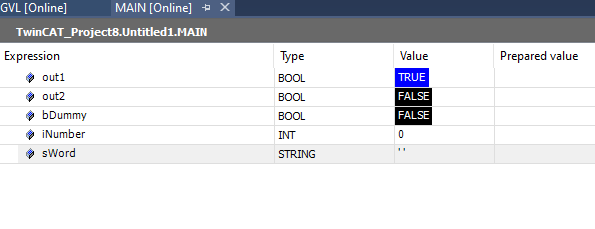

### Now run the script and look at the console output and TwinCat


```
C:\Users\MaxwellA.BECKHOFF\PycharmProjects\FirstPorject\venv\Scripts\python.exe C:/Users/MaxwellA.BECKHOFF/PycharmProjects/FirstPorject/ADSfirstTime.py
Connected?: True
Local Address? : <AmsAddress 10.123.67.6.1.1:32929>
(5, 0)
For variable MAIN.bDummy:
before writing:  False
after writing:  True 

For variable MAIN.iNumber:
before writing:  0
after writing:  69 

For variable MAIN.sWord:
before writing:   
after writing:  Hello World! 

For variable GVL.bOut1:
before writing:  True
after writing:  True 

For variable GVL.bOut2:
before writing:  False
after writing:  True 


Process finished with exit code 0
```
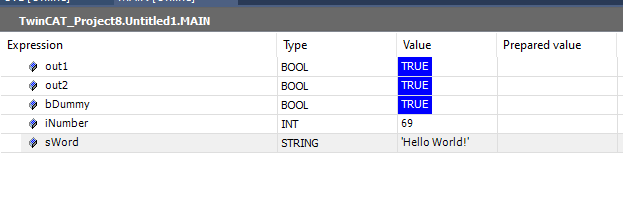








# **THATS ALL FOLKS!!**
### If you have any more questions, feel free to ask me :D
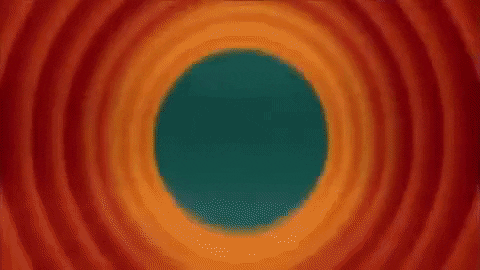